# Schematics

In [1]:
%matplotlib inline

# load common things
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# big figures/
mpl.rcParams['savefig.dpi'] = 2 * mpl.rcParams['savefig.dpi']

## Force balance time-series

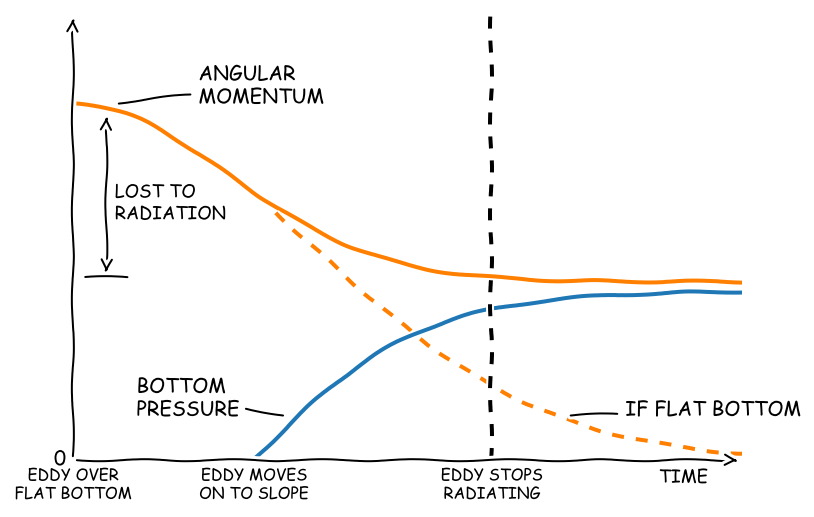

In [99]:
t = np.linspace(0,4,100)
am = 2 + 2 * np.exp(-(t/1.3)**2)
amflat = 4 * np.exp(-(t/2)**2)
t0 = 1.08;
pbot = 1.9 * np.tanh(t-t0)
coloram = [1,0.5,0];
colorbot = [0.12,0.47,0.71];

with plt.xkcd():
    plt.figure()
    plt.hold(True)
    plt.plot(t, am, color=coloram)
    plt.plot(t[30:], amflat[30:],  color=coloram, linestyle='--')
    plt.plot(t, pbot, color=colorbot)
    plt.ylim([0,5])

    # label axes
    ax = plt.gca()
    xtickloc = 2.5
    plt.xticks([0, t0, xtickloc])
    plt.yticks([0])
    plt.axvline(xtickloc, color='k', linestyle='--')
    ax.xaxis.set_tick_params(top='off', bottom='off')
    ax.yaxis.set_tick_params(left='off', right='off')
    ax.xaxis.set_ticklabels(['EDDY OVER\nFLAT BOTTOM', 
                             'EDDY MOVES\nON TO SLOPE',
                             'EDDY STOPS\nRADIATING'], size=8)

    # mark difference
    #plt.axhline(4, color='k', linestyle='--')
    plt.annotate('', xy=[0.2,am.max()-0.1], 
                    xytext=[0.2,am.min()+0.05],
                     arrowprops=dict(arrowstyle='<->'))
    plt.annotate('', xy=[0.05,am.min()+0.05], 
                    xytext=[0.35,am.min()+0.05],
                     arrowprops=dict(arrowstyle='-'))

    plt.text(0.25, 2.7, 'LOST TO\nRADIATION', size=9)

    # Easiest to draw axes as arrows using plt.annotate()
    plt.box(None)
    xlim = plt.xlim();
    ylim = plt.ylim();
    plt.annotate('', xy=[xlim[1],ylim[0]], xytext=[0,0],
                arrowprops=dict(arrowstyle='->'))
    plt.annotate('', xy=[xlim[0],ylim[1]], xytext=[0,0],
                arrowprops=dict(arrowstyle='->'))

    # fake x-axis label
    dx=0.5; dy=0.25;
    loc = [xlim[1]-dx, ylim[0]-dy];
    plt.text(loc[0], loc[1], 'TIME', size=9)

    # label lines
    plt.annotate('ANGULAR\nMOMENTUM', xy=[0.25,4], xytext=[0.75,4],
                arrowprops=dict(arrowstyle='-'), size=10)
    plt.annotate('BOTTOM\nPRESSURE', xy=[t0+0.2,0.50], xytext=[0.3+(t0-1),0.5],
                arrowprops=dict(arrowstyle='-'), size=10)
    plt.annotate('IF FLAT BOTTOM', xy=[2.95,0.50], xytext=[3.3,0.5],
                arrowprops=dict(arrowstyle='-'), size=10)
    
plt.savefig('images/force-timeseries-schematic.png', bbox_inches='tight')

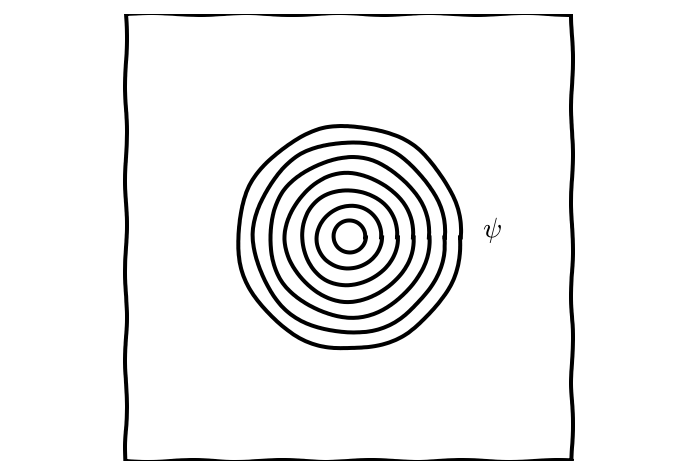

In [53]:
with plt.xkcd():
    plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1], color='k')
    plt.box(None)
    plt.hold(True)
    ax = plt.gca(); hfig = plt.gcf();
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    th = np.linspace(0,2*np.pi,100)
    for r in np.linspace(0,0.5,8):
        plt.plot(r*np.cos(th), r*np.sin(th), color='k')
                        
    plt.text(0.6,0, r'$\psi$')
    plt.axis('equal')

plt.savefig('images/integrate-schematic.png')